## <font color = 'purple'>Notebook 7: Latent Dirichlet Allocation (LDA)</font>

<font color = 'purple'>LDA is an unsupervised machine learning algorithm used for topic modelling, which identifies underlying themes or "topics" in a collection of documents based on word patterns.</font>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving main_dataset.xlsx to main_dataset.xlsx


In [ ]:
# Libraries for data processing
import numpy as np
import pandas as pd

# Libraries for text processing and NLP
import nltk
from textblob import TextBlob

# Gensim library for topic modelling and text vectorisation
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

# Libraries for data visualisation
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt

# Miscellaneous imports
import re
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel('main_dataset.xlsx')

print("Shape of the dataset:", df.shape)
print("Columns in the dataset:", df.columns)

df.head()

Shape of the dataset: (44855, 4)
Columns in the dataset: Index(['date', 'review', 'rating', 'userName'], dtype='object')


,date,review,rating,userName
0,2021-05-06 05:15:00.000,This feature has been one of the most annoying...,5,Keanu De Sousa
1,2024-02-01 09:06:59.904,"The privacy on WhatsApp is incredible, I know ...",4,The great idea!!!
2,2023-08-14 05:42:00.000,"Hi WhatsApp,\nThis app is really great, I use ...",4,Pokey Ball ‚öæÔ∏è
3,2024-08-04 15:53:00.384,If there was ever an equivalent of social serv...,1,Zenicero
4,2024-05-26 01:12:59.616,Im on holiday and reliant on whatsapp to commu...,1,JohnDoe63737286


In [ ]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if you haven't already
nltk.download('stopwords')

# Set of stopwords in English
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if pd.isna(text) or not isinstance(text, str):
        return ""

    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Split text into words and remove stopwords
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]

    # Join the filtered words back into a single string
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text

# Apply the updated preprocess_text function to your dataset
df['content_cleaned'] = df['review'].apply(preprocess_text)

# Display the first few rows of the cleaned content
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,date,review,rating,userName,content_cleaned
0,2021-05-06 05:15:00.000,This feature has been one of the most annoying...,5,Keanu De Sousa,feature one annoying aspects whatsapp everytim...
1,2024-02-01 09:06:59.904,"The privacy on WhatsApp is incredible, I know ...",4,The great idea!!!,privacy whatsapp incredible know probably donä...
2,2023-08-14 05:42:00.000,"Hi WhatsApp,\nThis app is really great, I use ...",4,Pokey Ball ‚öæÔ∏è,hi whatsapp app really great use everyday exac...
3,2024-08-04 15:53:00.384,If there was ever an equivalent of social serv...,1,Zenicero,ever equivalent social services took words awa...
4,2024-05-26 01:12:59.616,Im on holiday and reliant on whatsapp to commu...,1,JohnDoe63737286,im holiday reliant whatsapp communicate agents...


In [ ]:
df.isnull()
total_null_values = df.isnull().sum().sum()
print("Total null values in the DataFrame: ", total_null_values)
df.fillna('', inplace = True)
df['date'] = pd.to_datetime(df['date'], dayfirst = True)
df = df[['content_cleaned', 'review', 'rating', 'date']]
df.head()

Total null values in the DataFrame:  12


,content_cleaned,review,rating,date
0,feature one annoying aspects whatsapp everytim...,This feature has been one of the most annoying...,5,2021-05-06 05:15:00.000
1,privacy whatsapp incredible know probably donä...,"The privacy on WhatsApp is incredible, I know ...",4,2024-02-01 09:06:59.904
2,hi whatsapp app really great use everyday exac...,"Hi WhatsApp,\nThis app is really great, I use ...",4,2023-08-14 05:42:00.000
3,ever equivalent social services took words awa...,If there was ever an equivalent of social serv...,1,2024-08-04 15:53:00.384
4,im holiday reliant whatsapp communicate agents...,Im on holiday and reliant on whatsapp to commu...,1,2024-05-26 01:12:59.616


In [ ]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['content_cleaned'].apply(get_sentiment)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.1 else
                                             ('negative' if x <- 0.1 else 'neutral'))

In [ ]:
df[['content_cleaned', 'rating', 'sentiment_label']]

,content_cleaned,rating,sentiment_label
0,feature one annoying aspects whatsapp everytim...,5,negative
1,privacy whatsapp incredible know probably donä...,4,positive
2,hi whatsapp app really great use everyday exac...,4,positive
3,ever equivalent social services took words awa...,1,positive
4,im holiday reliant whatsapp communicate agents...,1,negative
...,...,...,...
44850,free delivery prime,5,positive
44851,would expectamazon trying get hand pocket,3,neutral
44852,registry system mess sorting price low high wa...,2,neutral
44853,clothes furniture options kinda meh overall de...,3,neutral


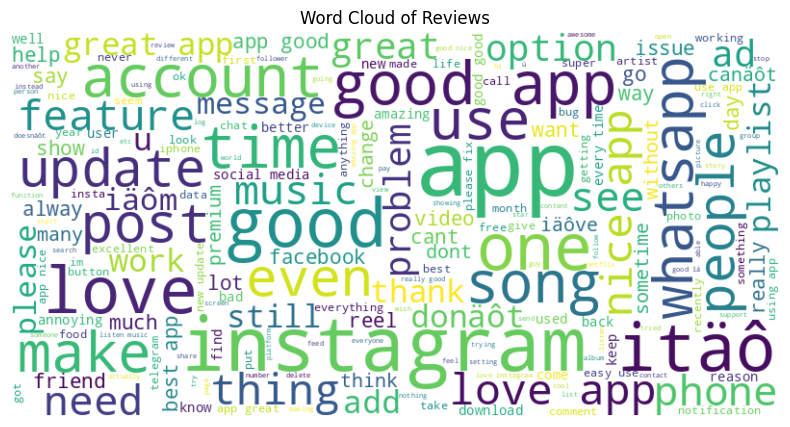

In [ ]:
# Combine all reviews into one large text for the word cloud
all_words = ' '.join([text for text in df['content_cleaned']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS, colormap='viridis').generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [ ]:
#pip install pyldavis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 18.9 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries for LDA
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [ ]:
# Tokenize the cleaned text into words for LDA
df['tokens'] = df['content_cleaned'].apply(gensim.utils.simple_preprocess)

# Create a dictionary and a corpus for LDA
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

print(f"Sample of the dictionary: {list(dictionary.items())[:10]}")
print(f"Sample of the corpus: {corpus[:1]}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sample of the dictionary: [(0, 'always'), (1, 'annoying'), (2, 'aspects'), (3, 'data'), (4, 'default'), (5, 'device'), (6, 'download'), (7, 'everytime'), (8, 'feature'), (9, 'features')]
Sample of the corpus: [[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 3)]]


In [ ]:
num_topics = 5
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)

topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.293*"good" + 0.058*"app" + 0.027*"îá" + 0.021*"excellent" + 0.012*"amazon"')
(1, '0.124*"app" + 0.092*"nice" + 0.046*"best" + 0.046*"love" + 0.024*"instagram"')
(2, '0.019*"app" + 0.018*"like" + 0.013*"music" + 0.011*"songs" + 0.010*"time"')
(3, '0.027*"whatsapp" + 0.021*"app" + 0.018*"please" + 0.016*"account" + 0.014*"cant"')
(4, '0.025*"aap" + 0.017*"amazing" + 0.007*"îâ" + 0.007*"úú" + 0.007*"superb"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


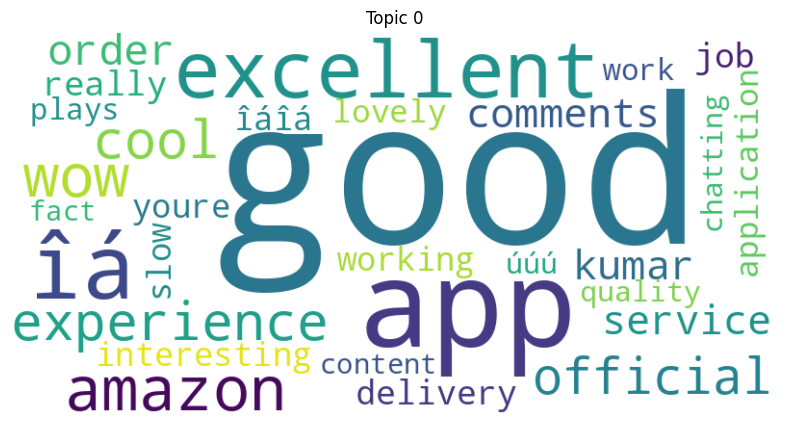

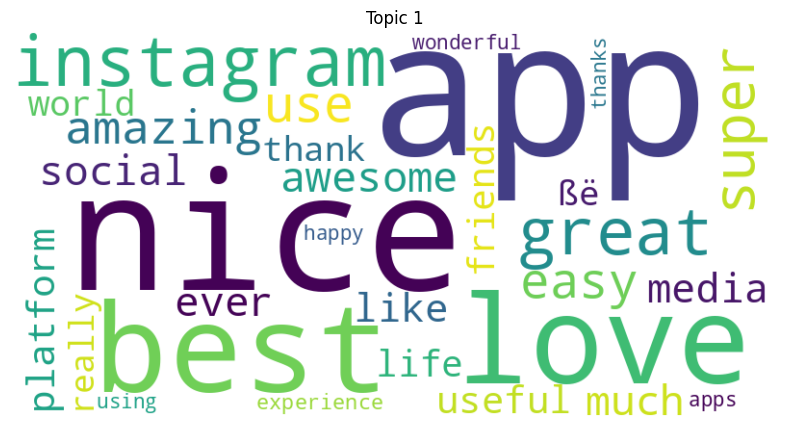

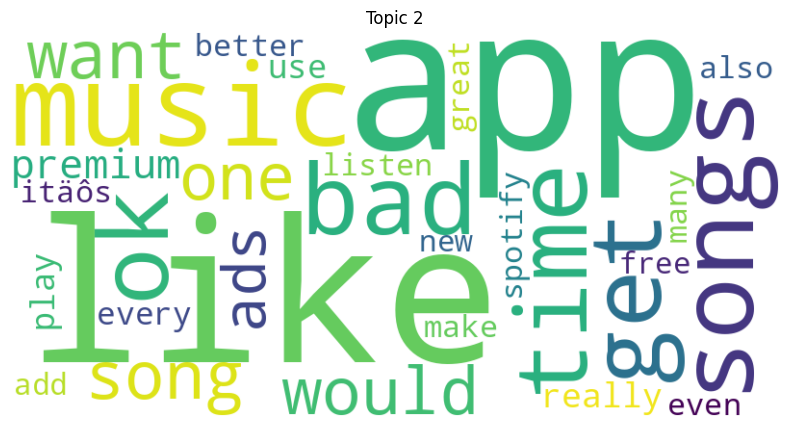

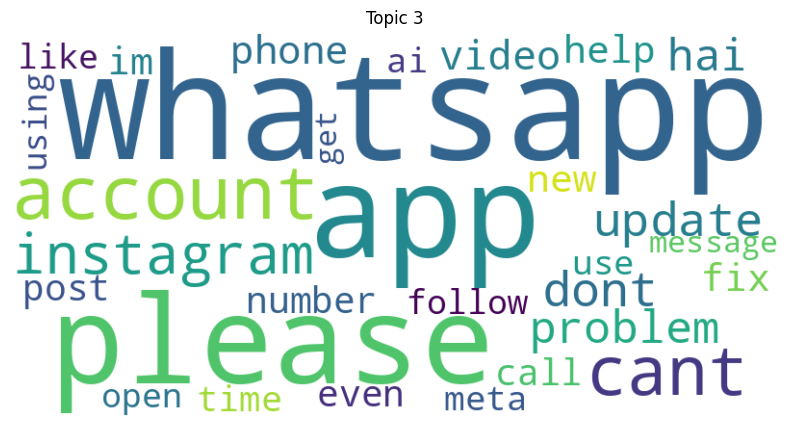

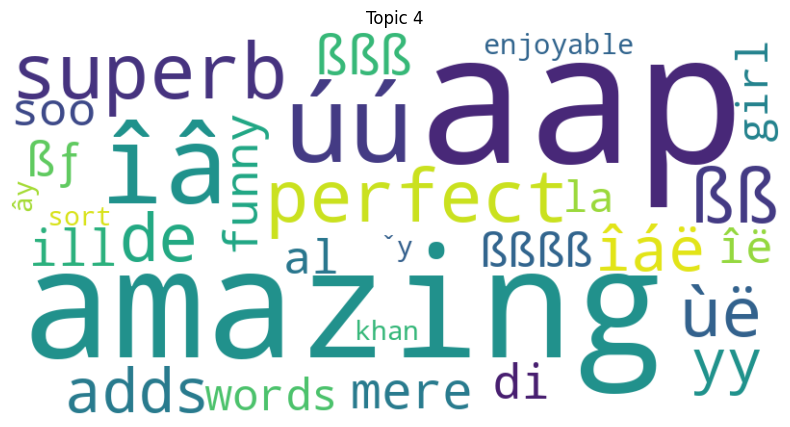

In [ ]:
# Save LDA results for visualization
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

# Generate word clouds for each topic
for i in range(num_topics):
    plt.figure(figsize=(10, 5))
    plt.title(f'Topic {i}')

    words = dict(lda_model.show_topic(i, topn=30))

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(words)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [ ]:
# Function to get the dominant topic for each review
def get_dominant_topic(lda_model, bow):

  topic_distribution = lda_model.get_document_topics(bow, minimum_probability=0.0)

  sorted_topics = sorted(topic_distribution, key=lambda x: x[1], reverse = True)

  dominant_topic = sorted_topics[0][0]
  topic_prob = sorted_topics[0][1]

  return dominant_topic, topic_prob

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create a function to map topics back to the reviews
def extract_topics_from_reviews(df, lda_model, dictionary):
  topics_data = []

  for index, row in df.iterrows():
    bow = dictionary.doc2bow(row['tokens'])

    dominant_topic, topic_prob = get_dominant_topic(lda_model, bow)

    topic_keywords = lda_model.show_topic(dominant_topic, topn = 5)
    topic_keywords = ', '.join([word for word, prob in topic_keywords])

    # Append the review index, dominant topic, and topic keywords to the list
    topics_data.append({
        'review': row['content_cleaned'],
        'dominant_topic': dominant_topic,
        'topic_prob': topic_prob,
        'topic_keywords': topic_keywords
    })

  topics_df = pd.DataFrame(topics_data)

  return topics_df

topics_df = extract_topics_from_reviews(df, lda_model, dictionary)
topics_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review,dominant_topic,topic_prob,topic_keywords
0,feature one annoying aspects whatsapp everytim...,3,0.467904,"whatsapp, app, please, account, cant"
1,privacy whatsapp incredible know probably donä...,2,0.558747,"app, like, music, songs, time"
2,hi whatsapp app really great use everyday exac...,1,0.435716,"app, nice, best, love, instagram"
3,ever equivalent social services took words awa...,4,0.419468,"aap, amazing, îâ, úú, superb"
4,im holiday reliant whatsapp communicate agents...,3,0.760128,"whatsapp, app, please, account, cant"


In [ ]:
# Save the DataFrame to an Excel file
output_filename = "reviews_with_topics.xlsx"
df.to_excel(output_filename, index = False)

from google.colab import files
files.download(output_filename)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print("Perplexity: ", lda_model.log_perplexity(corpus))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perplexity:  -7.908915509029335


In [ ]:
# Tokenizing the cleaned reviews
df['content_tokenized'] = df['content_cleaned'].apply(lambda x: simple_preprocess(x, deacc=True))

# Store tokenized content into 'processed_texts'
processed_texts = df['content_tokenized'].tolist()

# Create the dictionary and corpus again if not done
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print("Coherence Score: ", coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score:  0.5231993058455959


In [ ]:
# Number of top words to consider for each topic
top_n_words = 10

# Extract the top N words for each topic
topics = lda_model.show_topics(formatted=False, num_words=top_n_words)

# Get all the words from all topics
topic_words = []
for topic in topics:
    topic_words.extend([word[0] for word in topic[1]])  # Extract word only

# Calculate unique words
unique_words = set(topic_words)

# Calculate Topic Diversity
topic_diversity = len(unique_words) / (top_n_words * len(topics))

print("Topic Diversity: ", topic_diversity)

Topic Diversity:  0.9


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.models import CoherenceModel
import numpy as np
import itertools

# Define possible hyperparameter ranges
num_topics_range = [5, 10, 15]  # Test different number of topics
alpha_range = ['symmetric', 'asymmetric', 0.01, 0.31]  # Test different alpha values
beta_range = ['symmetric', 0.01, 0.31]  # Test different beta values

# Initialize variables to track the best model
best_coherence = 0
best_model = None
best_params = {}

# Preprocess data (assuming you have `processed_texts` ready)
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Grid search through the parameters
for num_topics, alpha, beta in itertools.product(num_topics_range, alpha_range, beta_range):
    lda_model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         alpha=alpha,
                         eta=beta,
                         random_state=42,
                         passes=10)

    # Compute coherence score (you can also calculate perplexity)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()

    # Track the best coherence score
    if coherence_score > best_coherence:
        best_coherence = coherence_score
        best_model = lda_model
        best_params = {
            'num_topics': num_topics,
            'alpha': alpha,
            'beta': beta
        }

print("Best Model Hyperparameters: ", best_params)
print("Best Coherence Score: ", best_coherence)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Model Hyperparameters:  {'num_topics': 5, 'alpha': 'asymmetric', 'beta': 0.31}
Best Coherence Score:  0.6058107876862453
